In [1]:
!pip install nba_api

In [21]:
import pandas as pd
import nba_api
import matplotlib.pyplot as plt

In [22]:
from nba_api.stats.endpoints import shotchartdetail 
from nba_api.stats.endpoints import commonteamroster
from nba_api.stats.static import players

In [23]:
player = players.find_players_by_full_name("Nikola Jokic")[0]
player_id = player['id']

shots = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=player_id,
    season_nullable="2022-23",
    context_measure_simple="FGA"
)

df = shots.get_data_frames()[0]


In [31]:
dfsimp = df[['LOC_X','LOC_Y','SHOT_MADE_FLAG','SHOT_ZONE_BASIC','SHOT_DISTANCE','SHOT_TYPE']]


In [32]:
dfsimp

,LOC_X,LOC_Y,SHOT_MADE_FLAG,SHOT_ZONE_BASIC,SHOT_DISTANCE,SHOT_TYPE
0,-7,13,1,Restricted Area,1,2PT Field Goal
1,28,64,1,In The Paint (Non-RA),6,2PT Field Goal
2,47,26,1,In The Paint (Non-RA),5,2PT Field Goal
3,-16,-6,1,Restricted Area,1,2PT Field Goal
4,11,17,1,Restricted Area,2,2PT Field Goal
...,...,...,...,...,...,...
1017,11,56,0,In The Paint (Non-RA),5,2PT Field Goal
1018,17,69,0,In The Paint (Non-RA),7,2PT Field Goal
1019,20,-2,1,Restricted Area,2,2PT Field Goal
1020,-11,73,1,In The Paint (Non-RA),7,2PT Field Goal


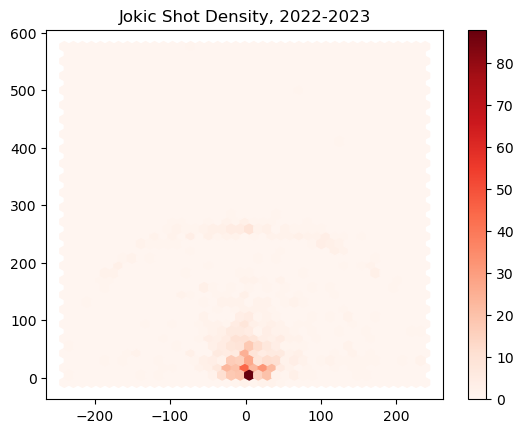

In [33]:
plt.hexbin(df.LOC_X, df.LOC_Y, gridsize=40, cmap='Reds')
plt.title("Jokic Shot Density, 2022-2023")
plt.colorbar()
plt.show()